<a href="https://www.kaggle.com/code/victoraesthete/deep-learning-c-filter-using-multithreading?scriptVersionId=215966820" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> # Applying filter using C++ for Paralel Computer Vision Task for increased efficiency ⭐

## Installation

In [1]:
!apt-get update && apt-get install -y libopencv-dev g++ cmake

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Hit:13 https

## 1. Grayscale

In [2]:
%%writefile grayScale.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void gray(cv::Mat colorImage){
    cv::Mat grayImage;
    cv::cvtColor(colorImage, grayImage, cv::COLOR_BGR2GRAY);

    // Save the grayscale image
    cv::imwrite("1. grayImg.jpg", grayImage);

    std::cout << "Grayscale image saved as grayImg.jpg" << std::endl;   
}

Writing grayScale.hpp


## 2. Gaussian Blur

In [3]:
%%writefile GaussianBlur.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void blur(cv::Mat colorImage){
    cv::Mat GaussianBlurImg; 
    cv::cvtColor(colorImage, GaussianBlurImg, cv::COLOR_BGR2GRAY);
    cv::GaussianBlur(colorImage, GaussianBlurImg, cv::Size(15, 15), 0);
    // Save the grayscale image
    cv::imwrite("2. blur.jpg", GaussianBlurImg);

    std::cout << "Gaussian Blur image saved as blur.jpg" << std::endl;   
}

Writing GaussianBlur.hpp


## 3. Median Filter

In [4]:
%%writefile medianFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void medianFilter(cv::Mat colorImage){
    cv::Mat medianFilterImg; 
    cv::medianBlur(colorImage, medianFilterImg, 15);

    // Save the grayscale image
    cv::imwrite("3. medianFilter.jpg", medianFilterImg);

    std::cout << "Median Filter image saved as medianFilter.jpg" << std::endl;   
}

Writing medianFilter.hpp


## 4. Canny Edge Detection

In [5]:
%%writefile edgeDetection.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void edgeDetection(cv::Mat colorImage){
    cv::Mat edgeImg;
    cv::Canny(colorImage, edgeImg,100, 200);
    // Save the grayscale image
    cv::imwrite("4. edgeImage.jpg", edgeImg);

    std::cout << "Edged image saved as edgeImage.jpg" << std::endl;
}

Writing edgeDetection.hpp


## 5. Sharpening

In [6]:
%%writefile sharpening.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void Sharpening(cv::Mat colorImage){
    cv::Mat sharpeImg; 
    cv::Mat kernel = (cv::Mat_<float>(3, 3) << 0, -1, 0, -1, 5, -1, 0, -1, 0);
    cv::filter2D(colorImage, sharpeImg, sharpeImg.depth(), kernel);
    // Save the grayscale image
    cv::imwrite("5. sharpeImage.jpg", sharpeImg);

    std::cout << "Sharp filtered image saved as sharpeImage.jpg" << std::endl;   
}

Writing sharpening.hpp


## 6. Laplacian Filter

In [7]:
%%writefile laplacianImage.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void laplaceImage(cv::Mat colorImage){
    cv::Mat laplacianImage;
    cv::Laplacian(colorImage, laplacianImage, CV_16S, 3);
    cv::convertScaleAbs(laplacianImage, laplacianImage);

    cv::imwrite("6. laplacianImg.jpg", laplacianImage);

    std::cout << "laplacian image saved as laplacianImg" << std::endl;   
}

Writing laplacianImage.hpp


## 7. Bilateral Filter

In [8]:
%%writefile BilateralFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void bilateral(cv::Mat colorImage){
    cv::Mat bilateralImage;
    cv::bilateralFilter(colorImage, bilateralImage, 15, 75, 75);
    cv::imwrite("7. bilateralImg.jpg", bilateralImage);

    std::cout << "Bilateral filter image saved as bilateralImg.jpg" << std::endl;   
}

Writing BilateralFilter.hpp


## 8. Box Filter

In [9]:
%%writefile BoxFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void box(cv::Mat colorImage){
    cv::Mat BoxImage;
    cv::boxFilter(colorImage, BoxImage, -1, cv::Size(15, 15));
    cv::imwrite("8. boxImg.jpg", BoxImage);

    std::cout << "Box filter image saved as boxImg.jpg" << std::endl;   
}

Writing BoxFilter.hpp


## 9. Sobel Edge Filter

In [10]:
%%writefile sobelEdgesFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void sobel(cv::Mat colorImage){
    cv::Mat grayImage;
    cv::cvtColor(colorImage, grayImage, cv::COLOR_BGR2GRAY);
    cv::Mat sobelX, sobelY;
    cv::Sobel(grayImage, sobelX, CV_32F, 1, 0, 3);
    cv::Sobel(grayImage, sobelY, CV_32F, 0, 1, 3);
    cv::Mat sobelEdges;
    cv::magnitude(sobelX, sobelY, sobelEdges);
    cv::imwrite("9. sobelEdges.jpg",sobelEdges );

    std::cout << "Sobel edge filtered image saved as sobelEdges.jpg" << std::endl;   
}

Writing sobelEdgesFilter.hpp


## 10. Invert Filter

In [11]:
%%writefile invertFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void invert(cv::Mat colorImage){
    cv::Mat invertedImage;
    cv::bitwise_not(colorImage, invertedImage);
    cv::imwrite("10. invertImg.jpg", invertedImage);

    std::cout << "Invert filter image saved as invertImg.jpg" << std::endl;   
}

Writing invertFilter.hpp


## 11. Sepia Filter

In [12]:
%%writefile sepiaFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void sepia(cv::Mat colorImage){
    cv::Mat sepiaImage = colorImage.clone();
    cv::Mat kernel = (cv::Mat_<float>(4, 4) << 0.393, 0.769, 0.189, 0, 
                                              0.349, 0.686, 0.168, 0, 
                                              0.272, 0.534, 0.131, 0,
                                              0, 0, 0, 1);
    cv::transform(sepiaImage, sepiaImage, kernel);
    cv::imwrite("11. sepiaImg.jpg", sepiaImage);

    std::cout << "Sepia filter saved as sepiaImg.jpg" << std::endl;   
}

Writing sepiaFilter.hpp


## 12. Threshold Filter

In [13]:
%%writefile thresholdFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void threshold(cv::Mat colorImage){
    cv::Mat binaryImage;
    cv::threshold(colorImage, binaryImage, 127, 255, cv::THRESH_BINARY);
    cv::imwrite("12. binaryImg.jpg", binaryImage);

    std::cout << "Thresholding filter image saved as binaryImg.jpg" << std::endl;   
}

Writing thresholdFilter.hpp


## 13. Custom Filter

In [14]:
%%writefile customFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void custom(cv::Mat colorImage){
    cv::Mat customKernel = (cv::Mat_<float>(3, 3) << 0, -1, 0, -1, 5, -1, 0, -1, 0);
    cv::Mat customFilteredImage;
    cv::filter2D(colorImage, customFilteredImage, colorImage.depth(), customKernel);

    cv::imwrite("13. customImg.jpg", customFilteredImage);

    std::cout << "custom filtered image saved as customImg.jpg" << std::endl;   
}

Writing customFilter.hpp


## 14. Dilation

In [15]:
%%writefile dilationFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void dilation(cv::Mat colorImage){
    cv::Mat binaryImage; 
    cv::cvtColor(colorImage, binaryImage, cv::COLOR_BGR2GRAY);

    cv::Mat dilatedImage;
    cv::dilate(binaryImage, dilatedImage, cv::Mat());

    cv::imwrite("14. dilatedImg.jpg", dilatedImage);

    std::cout << "Dilated filter image saved as dilatedImg.jpg" << std::endl;   
}

Writing dilationFilter.hpp


## 15. Erosion

In [16]:
%%writefile erodeFilter.hpp

#include <opencv2/opencv.hpp>
#include <iostream>
void erode(cv::Mat colorImage){
    cv::Mat binaryImage; 
    cv::cvtColor(colorImage, binaryImage, cv::COLOR_BGR2GRAY);

    cv::Mat erodedImage;
    cv::erode(binaryImage, erodedImage, cv::Mat());

    cv::imwrite("15. erodedImg.jpg", erodedImage);

    std::cout << "Eroded filter image saved as erodedImg.jpg" << std::endl;   
}

Writing erodeFilter.hpp


## Main Function

In [17]:
%%writefile main.cpp
#include <opencv2/opencv.hpp>
#include <iostream>
#include <thread>
#include "grayScale.hpp"
#include "GaussianBlur.hpp"
#include "medianFilter.hpp"
#include "edgeDetection.hpp"
#include "sharpening.hpp"
#include "laplacianImage.hpp"
#include "BilateralFilter.hpp"
#include "BoxFilter.hpp"
#include "sobelEdgesFilter.hpp"
#include "invertFilter.hpp"
#include "sepiaFilter.hpp"
#include "thresholdFilter.hpp"
#include "customFilter.hpp"
#include "dilationFilter.hpp"
#include "erodeFilter.hpp"

int main() {
    // Load the color image
    cv::Mat colorImage = cv::imread("/kaggle/input/bird-image/bird.jpg");
    if (colorImage.empty()) {
        std::cerr << "Error: Could not open the image file!" << std::endl;
        return -1;
    }


    std::thread t1(gray, colorImage);
    std::thread t2(blur, colorImage);
    std::thread t3(medianFilter, colorImage);
    std::thread t4(edgeDetection, colorImage);
    std::thread t5(Sharpening, colorImage);
    std::thread t6(laplaceImage, colorImage);
    std::thread t7(bilateral, colorImage);
    std::thread t8(box, colorImage);
    std::thread t9(sobel, colorImage);
    std::thread t10(invert, colorImage);
    std::thread t11(sepia, colorImage);
    std::thread t12(threshold, colorImage);
    std::thread t13(custom, colorImage);
    std::thread t14(dilation, colorImage);
    std::thread t15(erode, colorImage);

    // Join threads
    t1.join();
    t2.join();
    t3.join();
    t4.join();
    t5.join();
    t6.join();
    t7.join();
    t8.join();
    t9.join();
    t10.join();
    t11.join();
    t12.join();
    t13.join();
    t14.join();
    t15.join();

    return 0;
}


Writing main.cpp


In [18]:
!g++ -std=c++17 -pthread main.cpp -o parallel_filters `pkg-config --cflags --libs opencv4`
!./parallel_filters


Eroded filter image saved as erodedImg.jpg
Grayscale image saved as grayImg.jpg
Dilated filter image saved as dilatedImg.jpg
Invert filter image saved as invertImg.jpg
Box filter image saved as boxImg.jpg
Sharp filtered image saved as sharpeImage.jpg
Sobel edge filtered image saved as sobelEdges.jpg
Gaussian Blur image saved as blur.jpg
custom filtered image saved as customImg.jpg
Thresholding filter image saved as binaryImg.jpg
laplacian image saved as laplacianImg
Sepia filter saved as sepiaImg.jpg
Edged image saved as edgeImage.jpg
Median Filter image saved as medianFilter.jpg
Bilateral filter image saved as bilateralImg.jpg


## Displaying

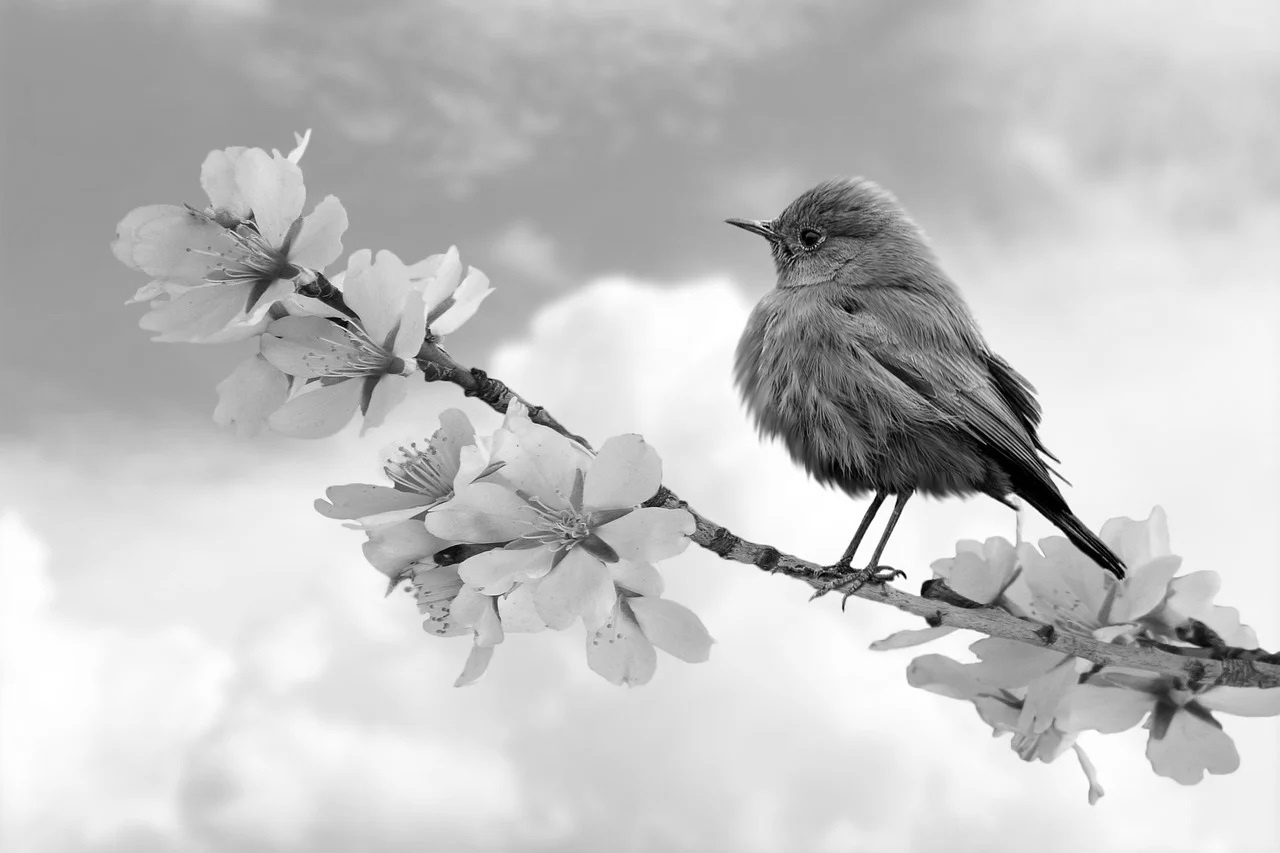

In [19]:
from IPython.display import Image, display

# Display
display(Image(filename="1. grayImg.jpg"))

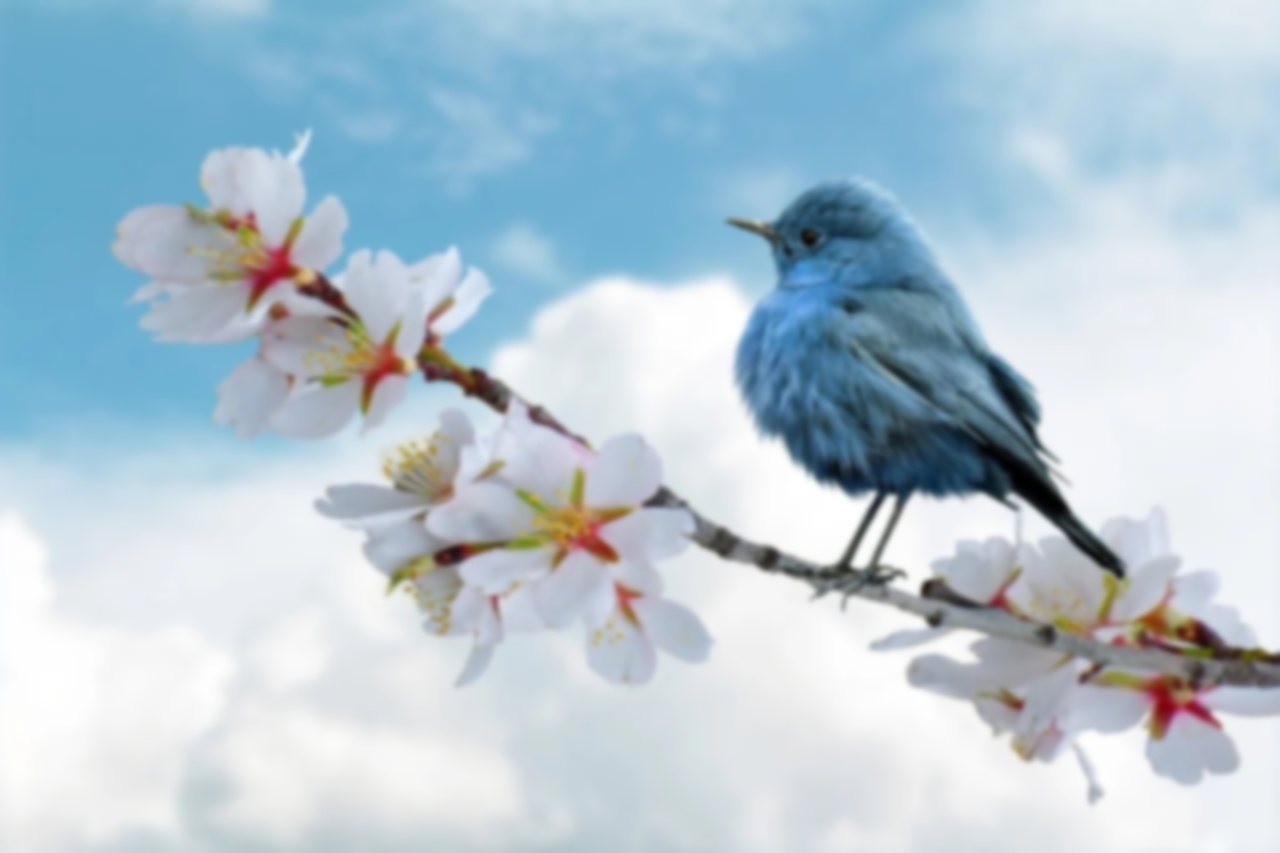

In [20]:
display(Image(filename="2. blur.jpg"))


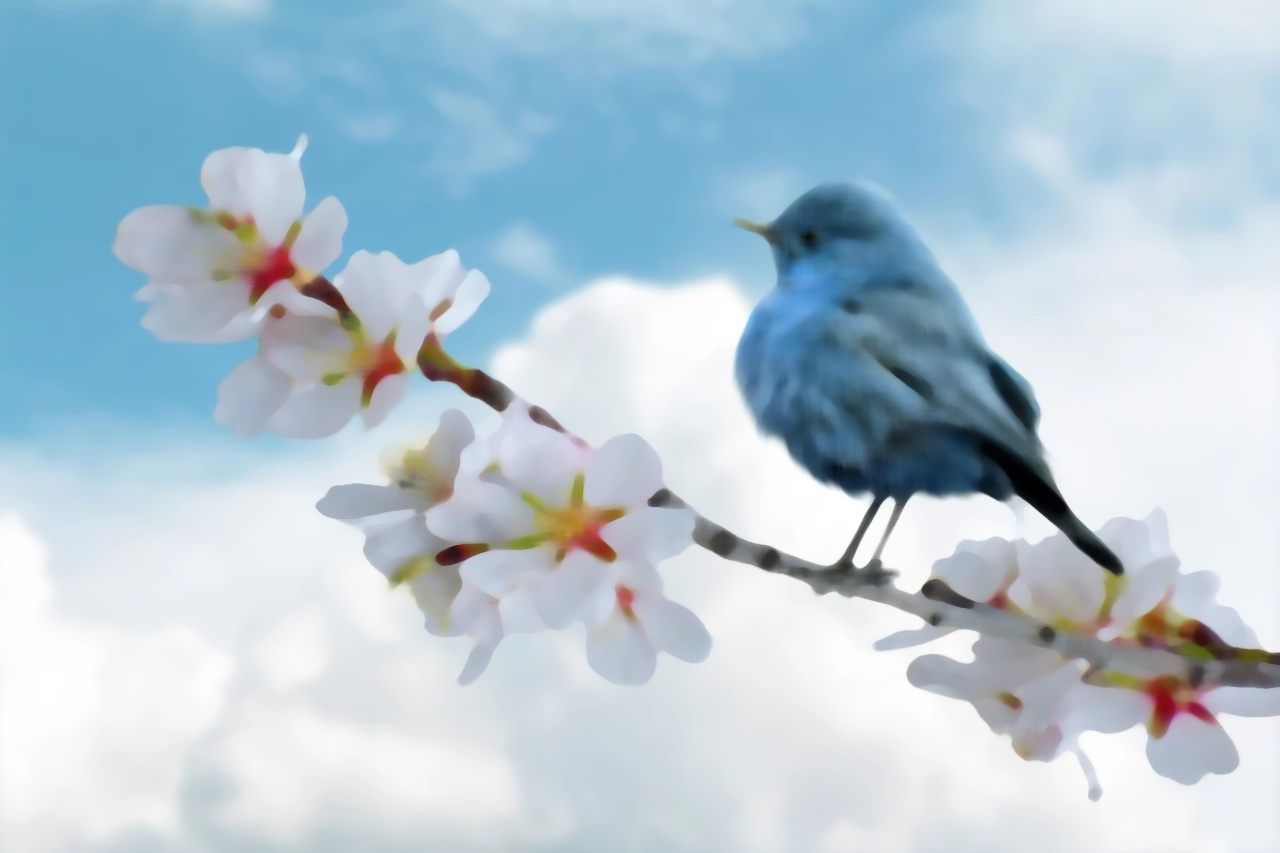

In [21]:
display(Image(filename="3. medianFilter.jpg"))

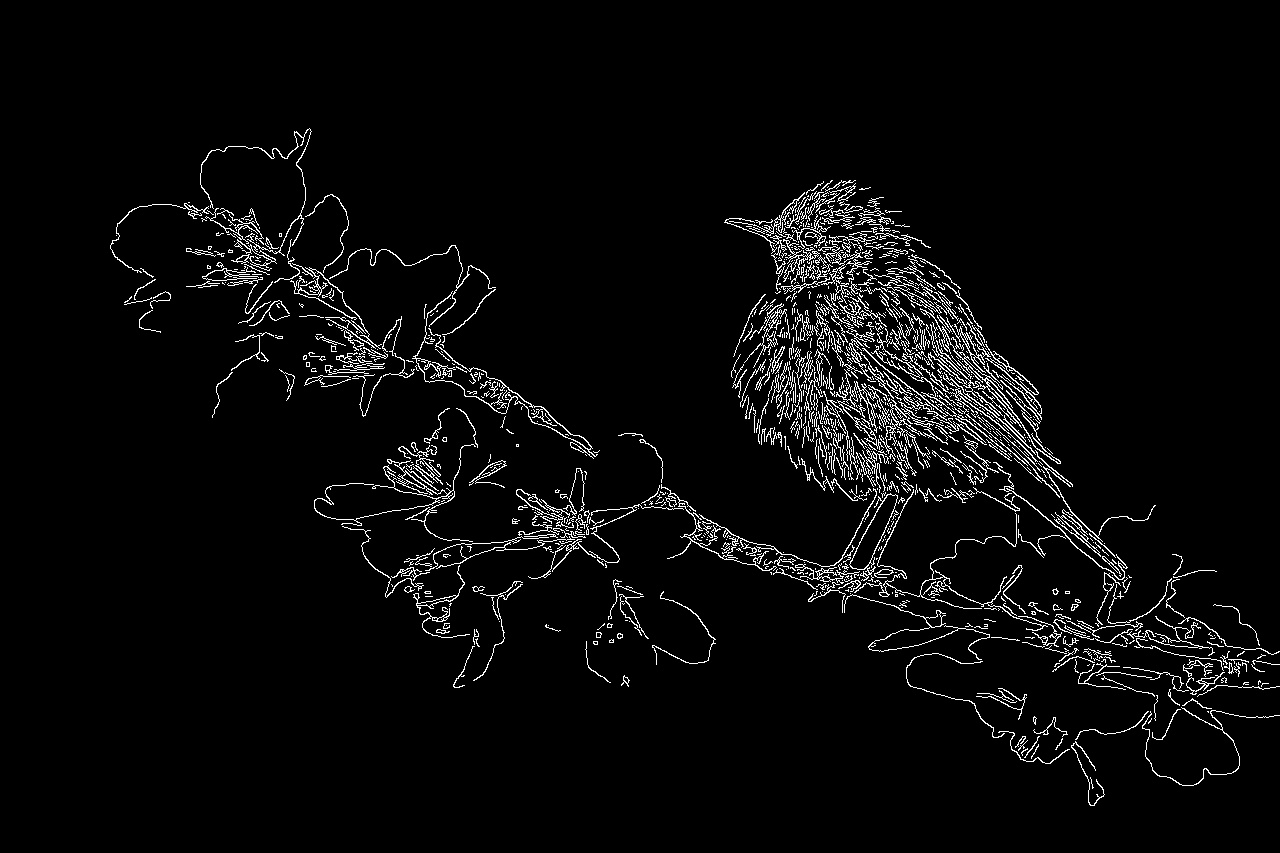

In [22]:
display(Image(filename="4. edgeImage.jpg"))

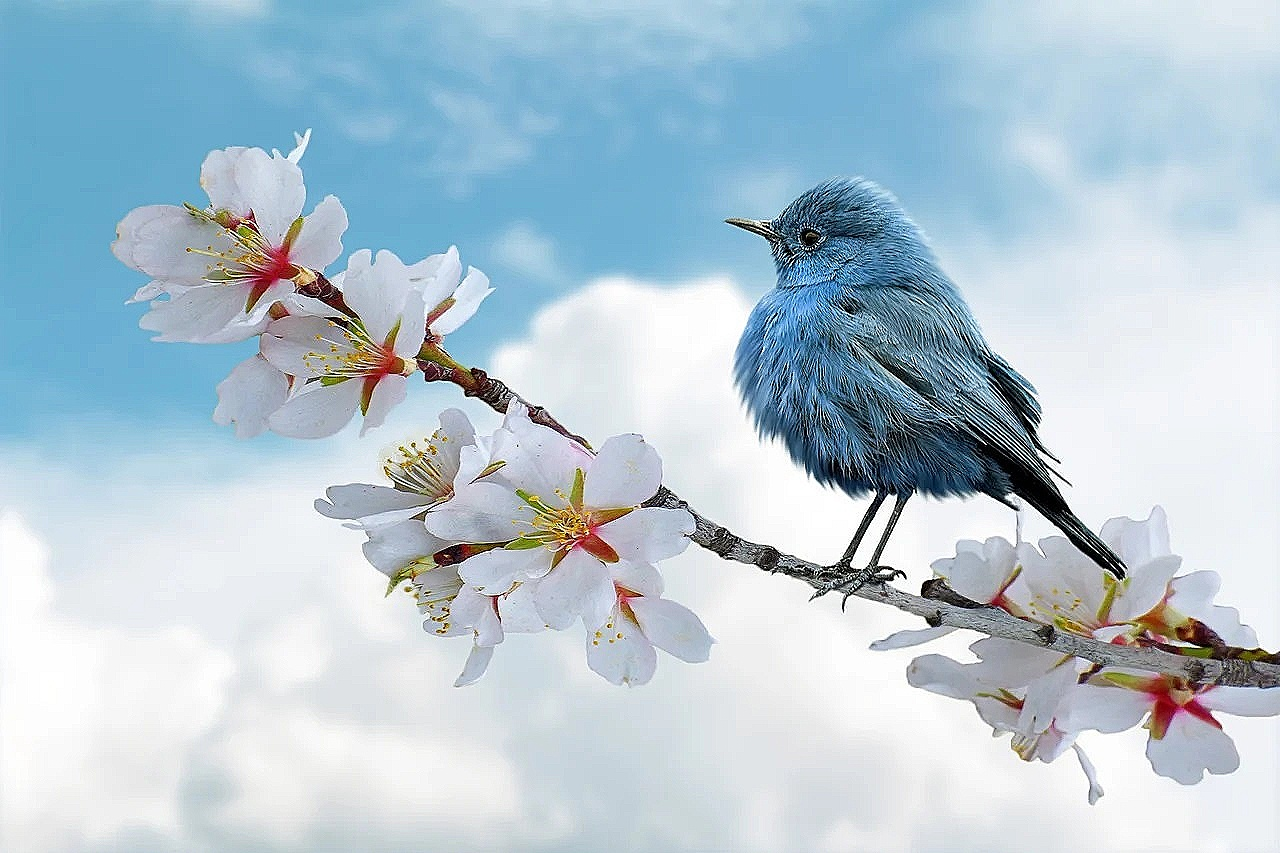

In [23]:
display(Image(filename="5. sharpeImage.jpg"))

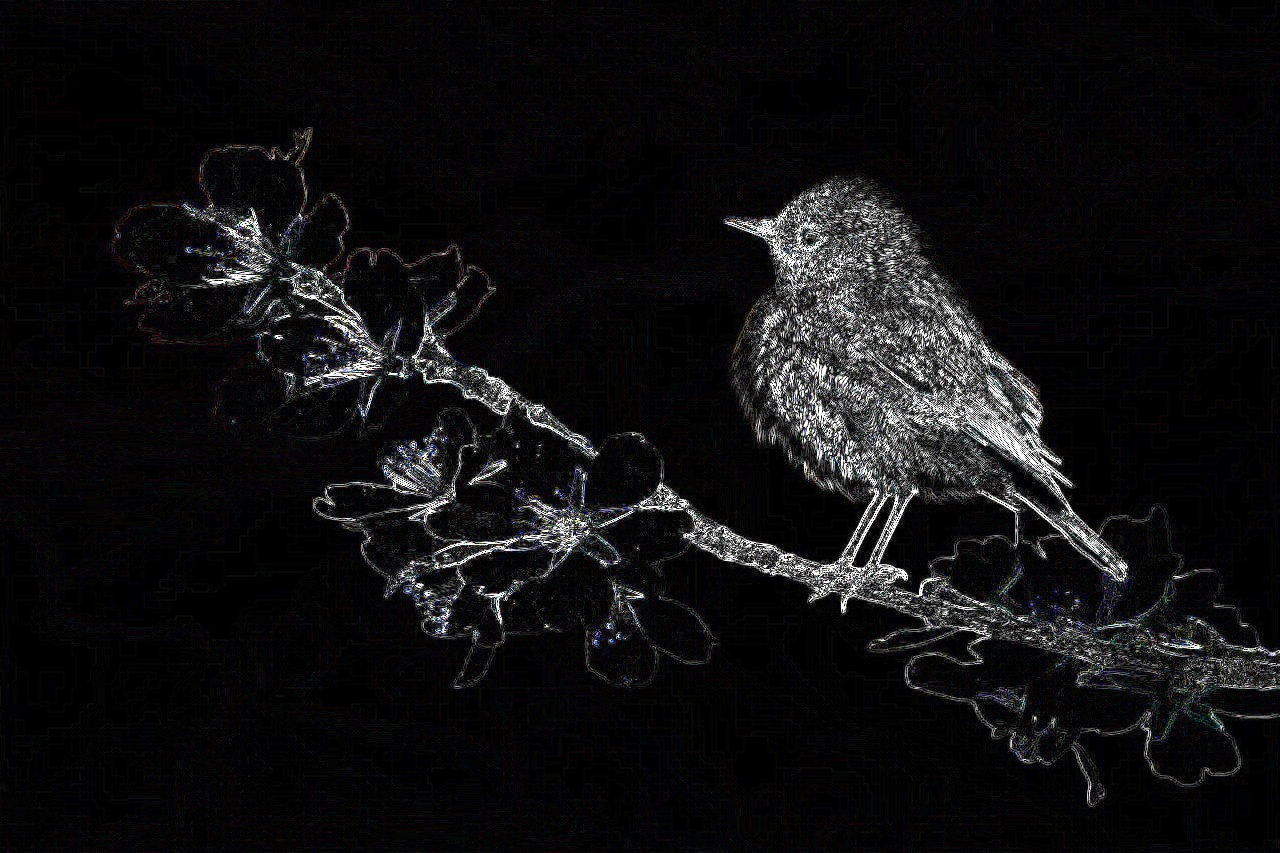

In [24]:
display(Image(filename="6. laplacianImg.jpg"))

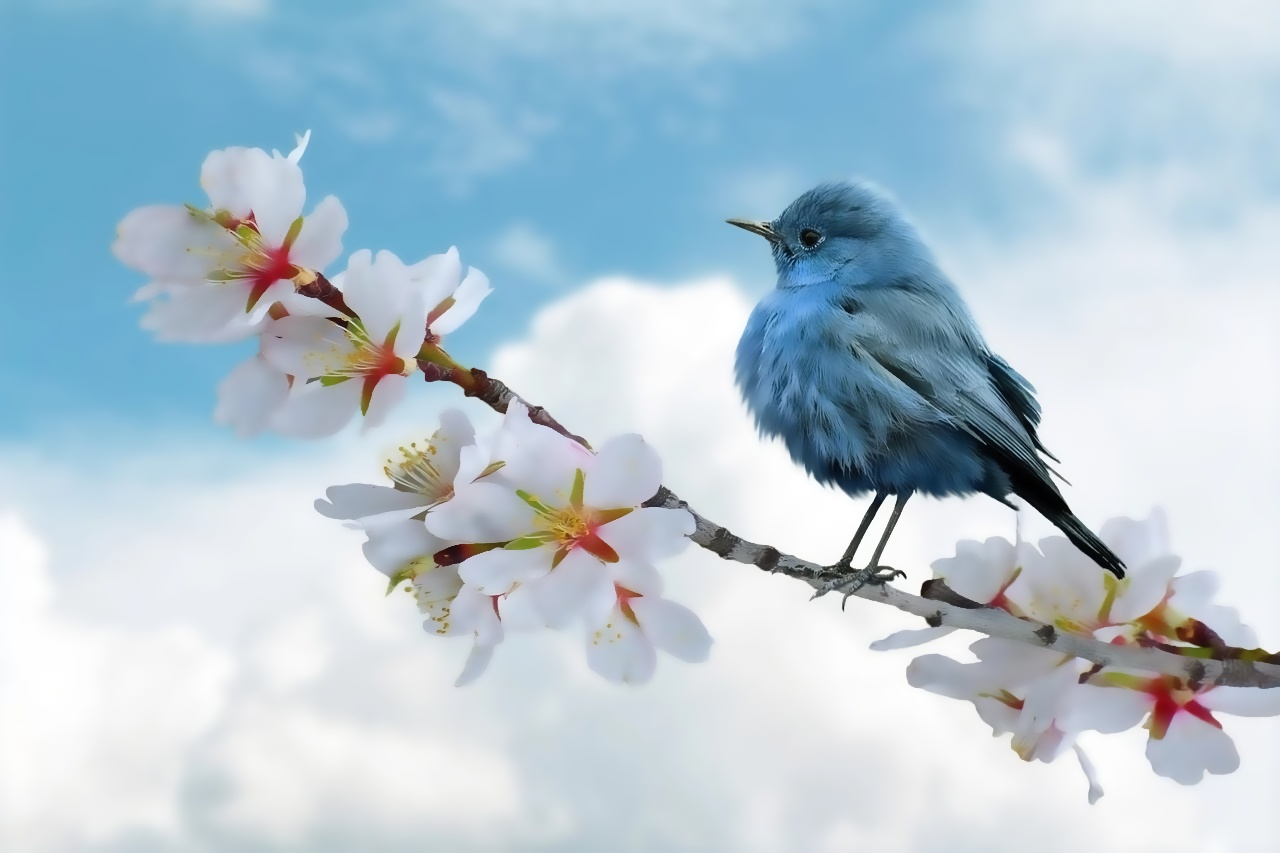

In [25]:
display(Image(filename="7. bilateralImg.jpg"))

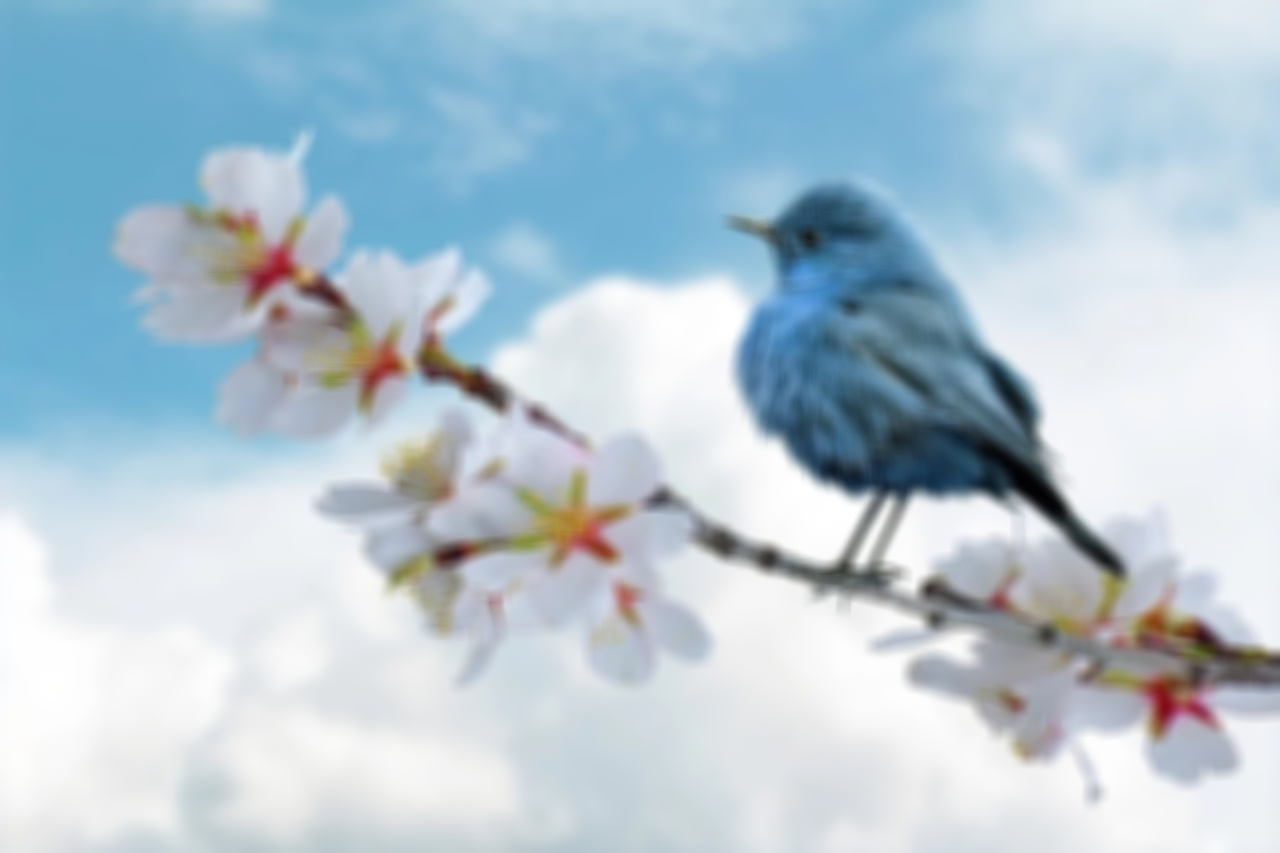

In [26]:
display(Image(filename="8. boxImg.jpg"))

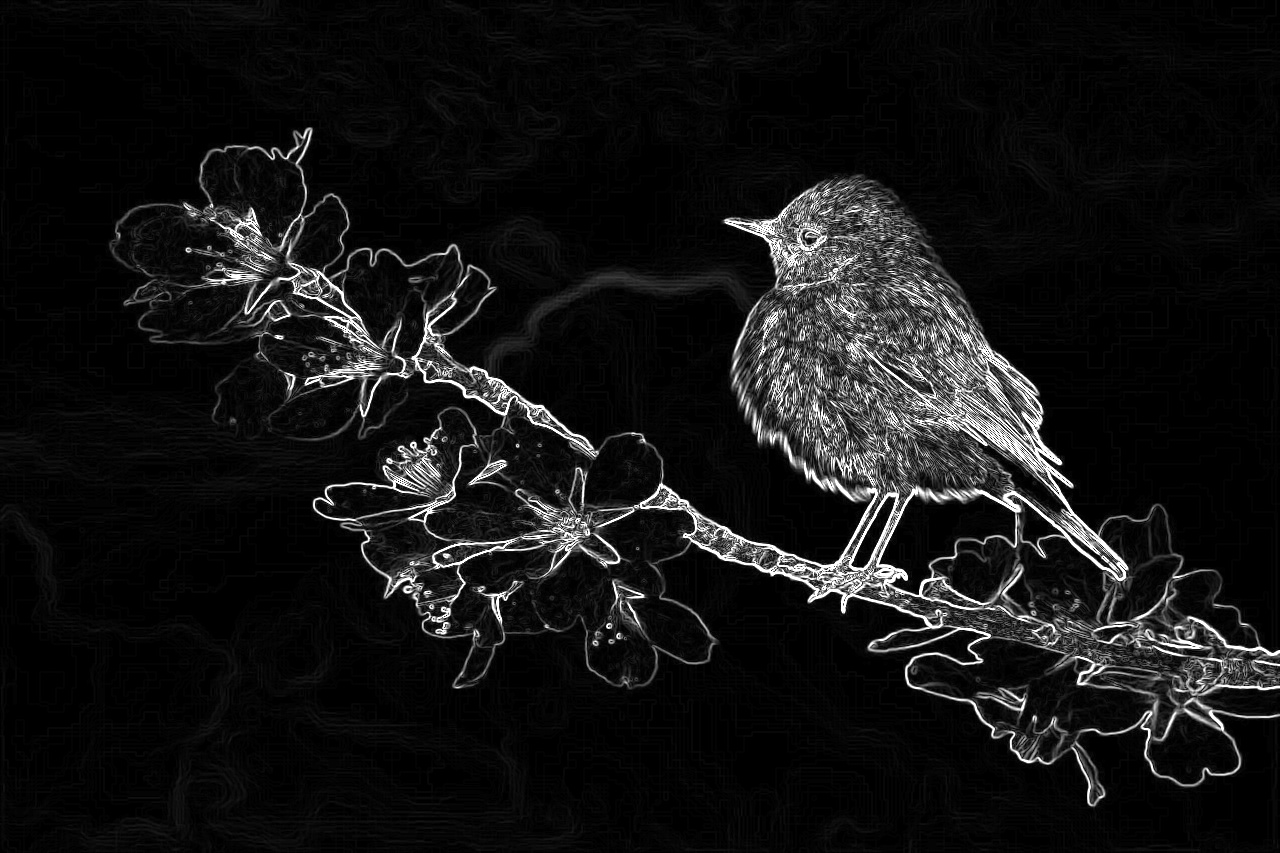

In [27]:
display(Image(filename="9. sobelEdges.jpg"))

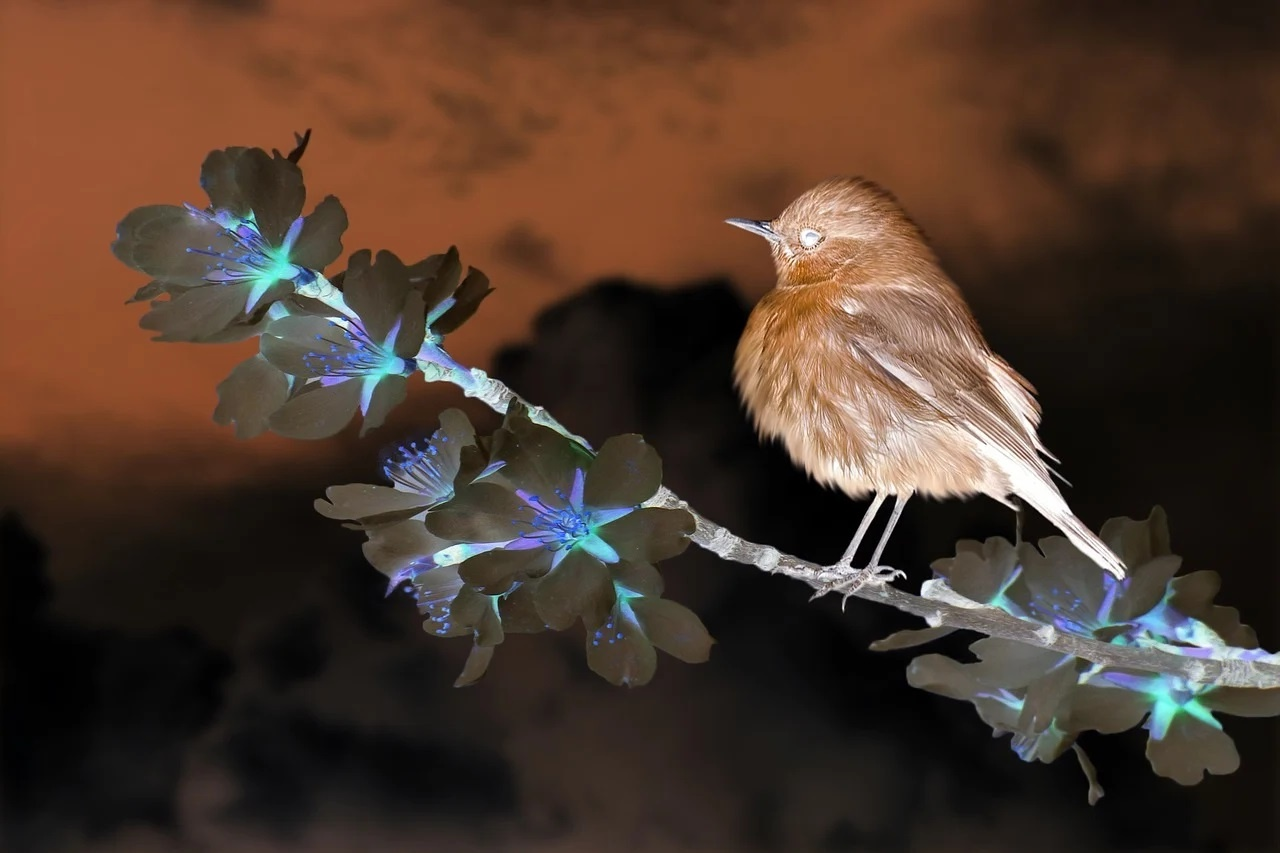

In [28]:
display(Image(filename="10. invertImg.jpg"))

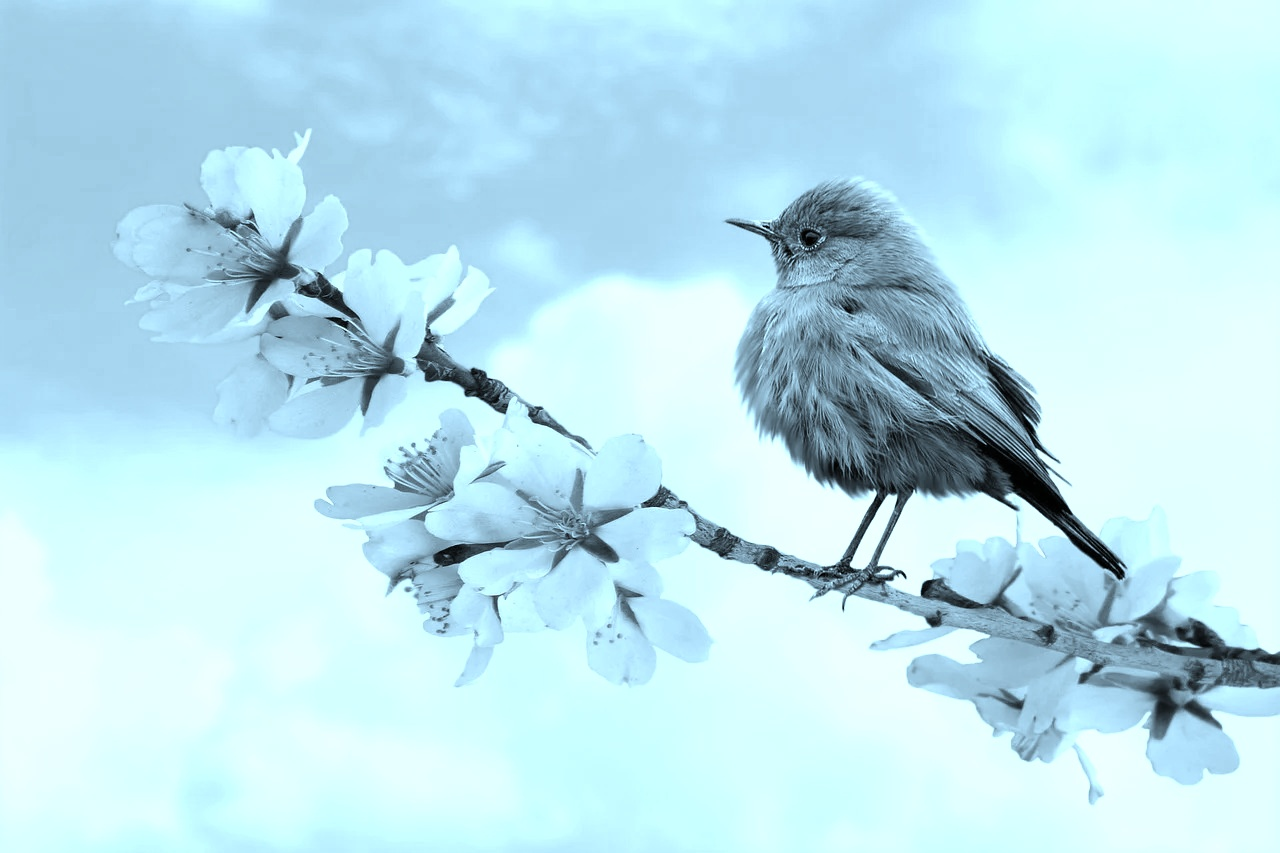

In [29]:
display(Image(filename="11. sepiaImg.jpg"))

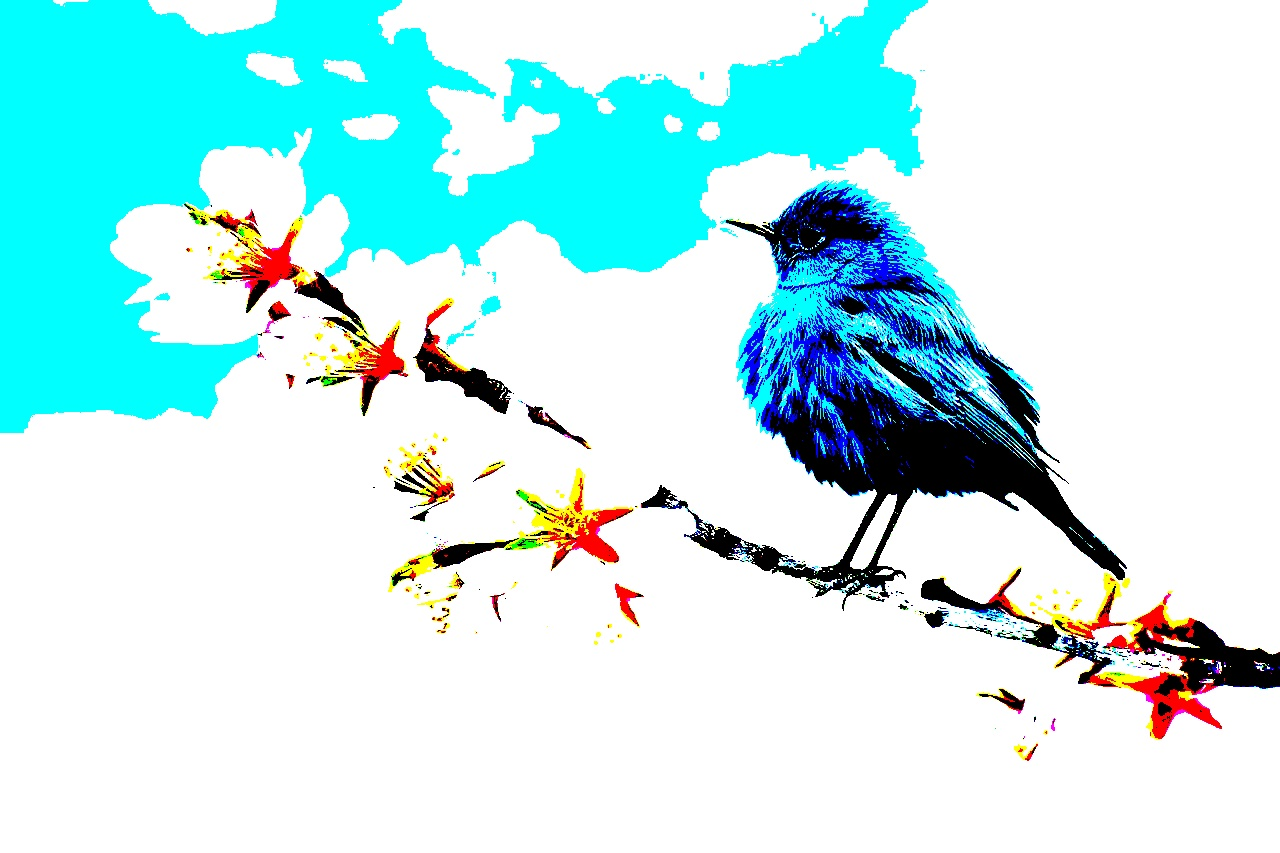

In [30]:
display(Image(filename="12. binaryImg.jpg"))

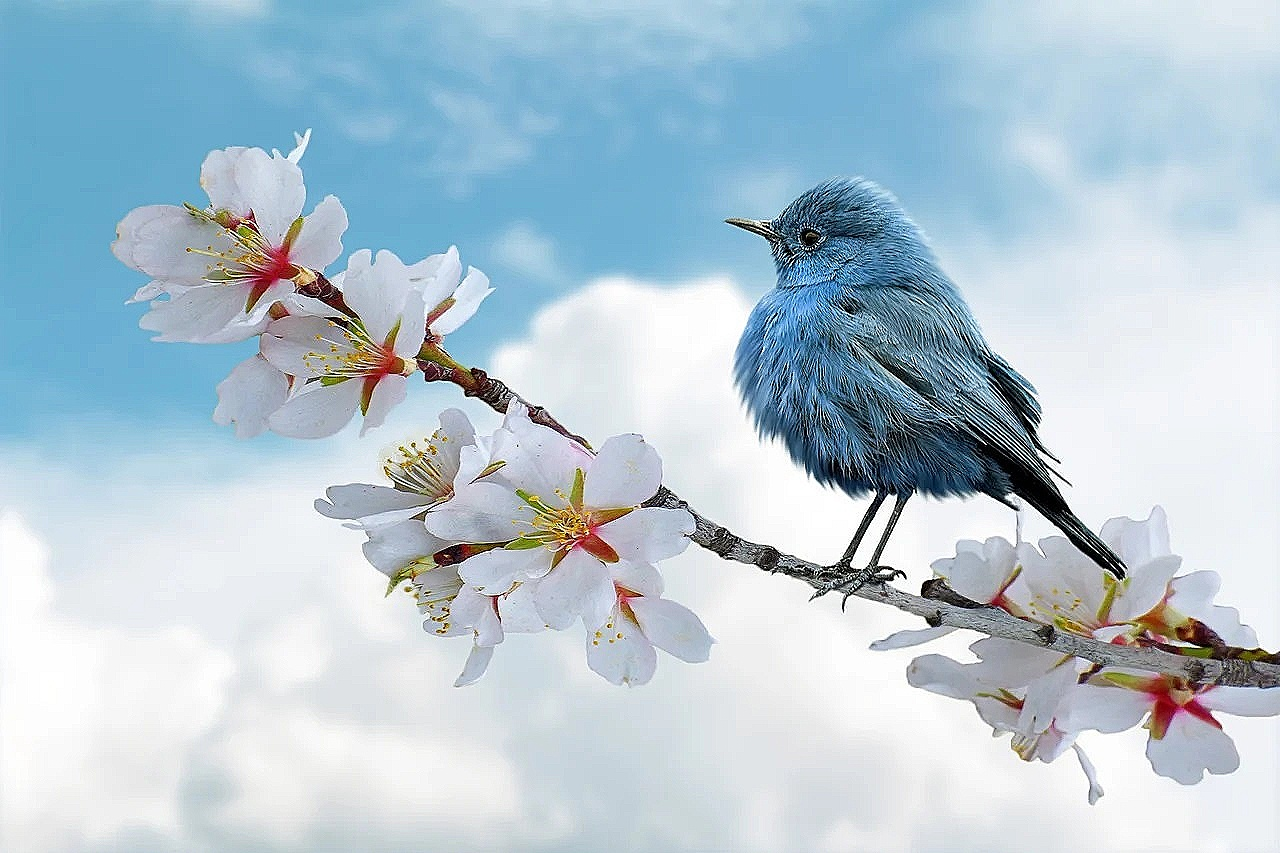

In [31]:
display(Image(filename="13. customImg.jpg"))

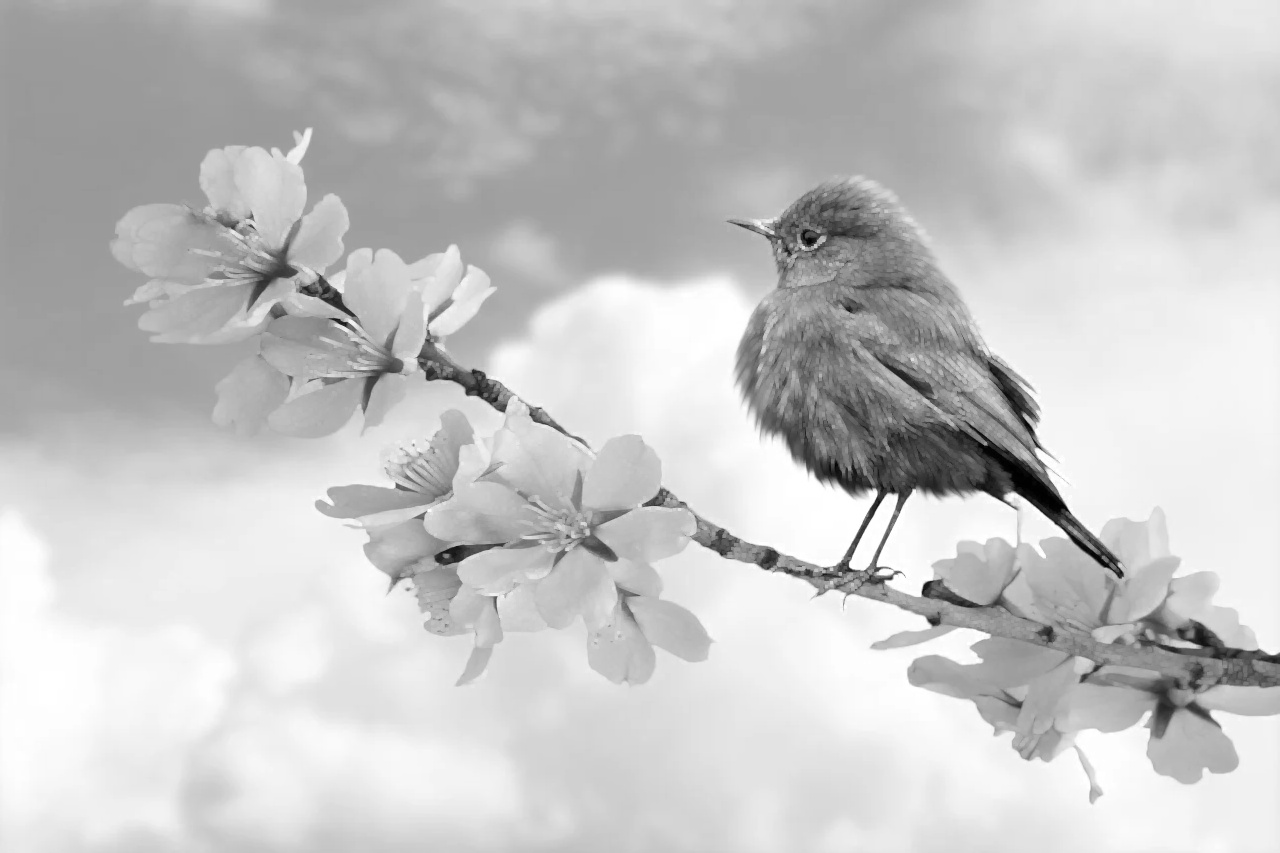

In [32]:
display(Image(filename="14. dilatedImg.jpg"))

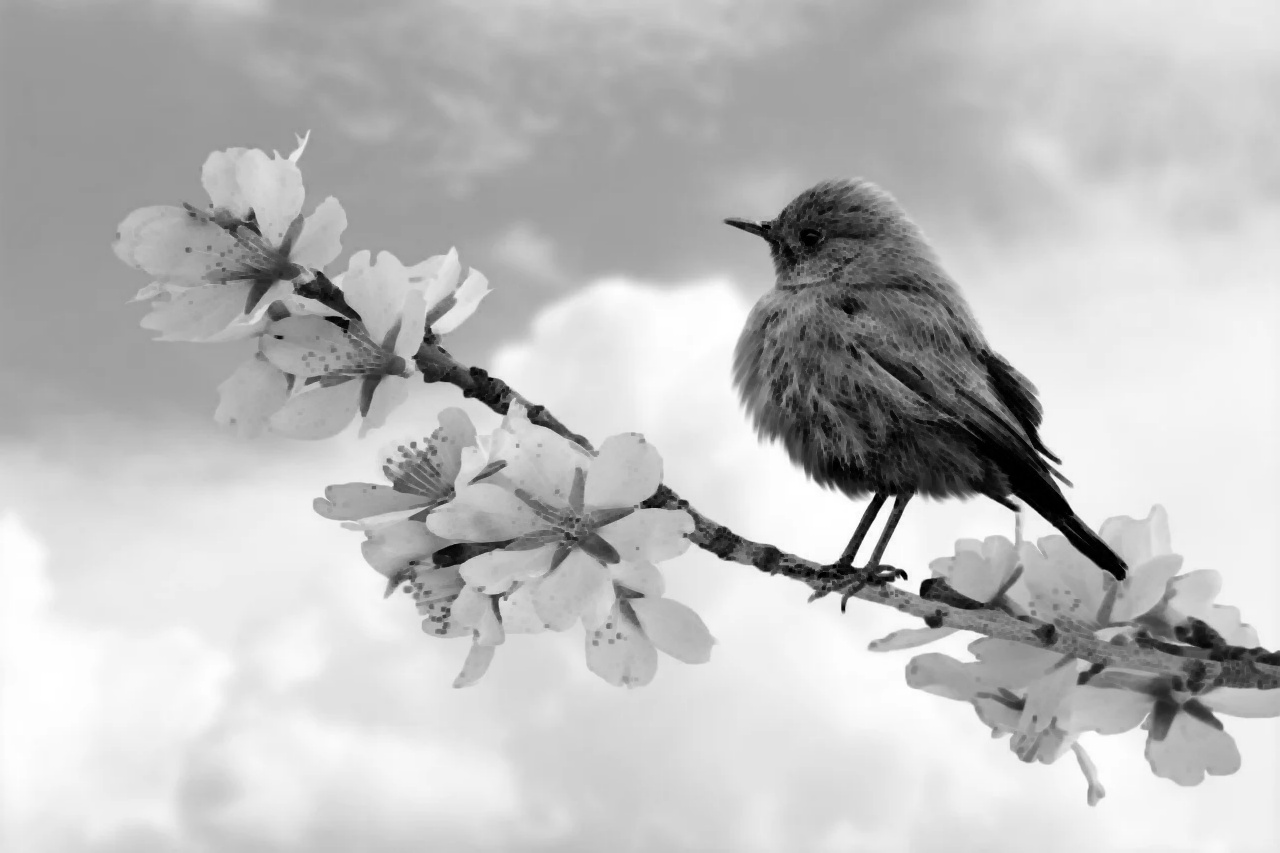

In [33]:
display(Image(filename="15. erodedImg.jpg"))

### -------------------------------------------------------  END --------------------------------------------------------